<a href="https://colab.research.google.com/github/abou-zithar/XGBoost/blob/main/SessionAI11_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Liberarires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read Data

In [ ]:
data=pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Handling Missing Values

In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
data['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [ ]:
data['education'].replace(np.nan,1.0,inplace=True)

In [ ]:
data['cigsPerDay'].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [ ]:
data['cigsPerDay'].replace(np.nan,0.0,inplace=True)

In [ ]:
def treat_outlier(value):
    if value>50 :
         value=50
    return value

data['cigsPerDay']=data['cigsPerDay'].apply(treat_outlier)

In [ ]:
data['BPMeds'].value_counts()

0.0    4063
1.0     124
Name: BPMeds, dtype: int64

In [ ]:
data['BPMeds'].replace(np.nan,0.0,inplace=True)

In [ ]:
data['totChol'].replace(np.nan,data['totChol'].mean(),inplace=True)


In [ ]:
data['BMI'].replace(np.nan,data['BMI'].mean(),inplace=True)
data['heartRate'].replace(np.nan,data['heartRate'].mean(),inplace=True)


In [ ]:
data['glucose'].value_counts()

75.0     193
77.0     167
73.0     156
80.0     153
70.0     152
        ... 
386.0      1
155.0      1
147.0      1
205.0      1
260.0      1
Name: glucose, Length: 143, dtype: int64

In [ ]:
data['glucose'].replace(np.nan,75.0,inplace=True)

(array([1961., 2098.,  127.,   16.,   13.,    6.,    7.,    4.,    3.,
           5.]),
 array([ 40. ,  75.4, 110.8, 146.2, 181.6, 217. , 252.4, 287.8, 323.2,
        358.6, 394. ]),
 <a list of 10 Patch objects>)

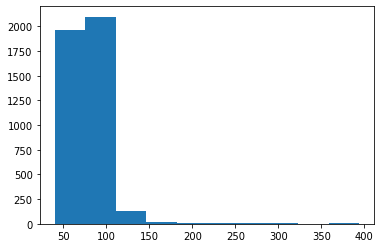

In [ ]:
plt.hist(data=data,x='glucose')

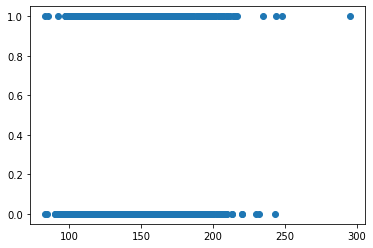

In [ ]:
plt.scatter(data.sysBP,data['TenYearCHD'])

In [ ]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Check Data Balancing

Text(0.5, 1.0, 'Sample In each Class')

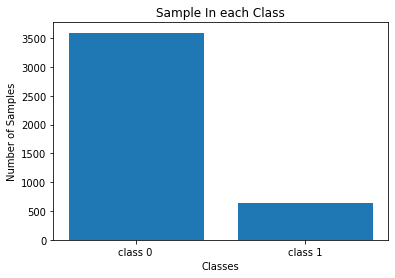

In [ ]:
X=[1,2]
plt.bar(X,data.TenYearCHD.value_counts())
plt.xticks(X,['class 0 ','class 1'])
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title("Sample In each Class")

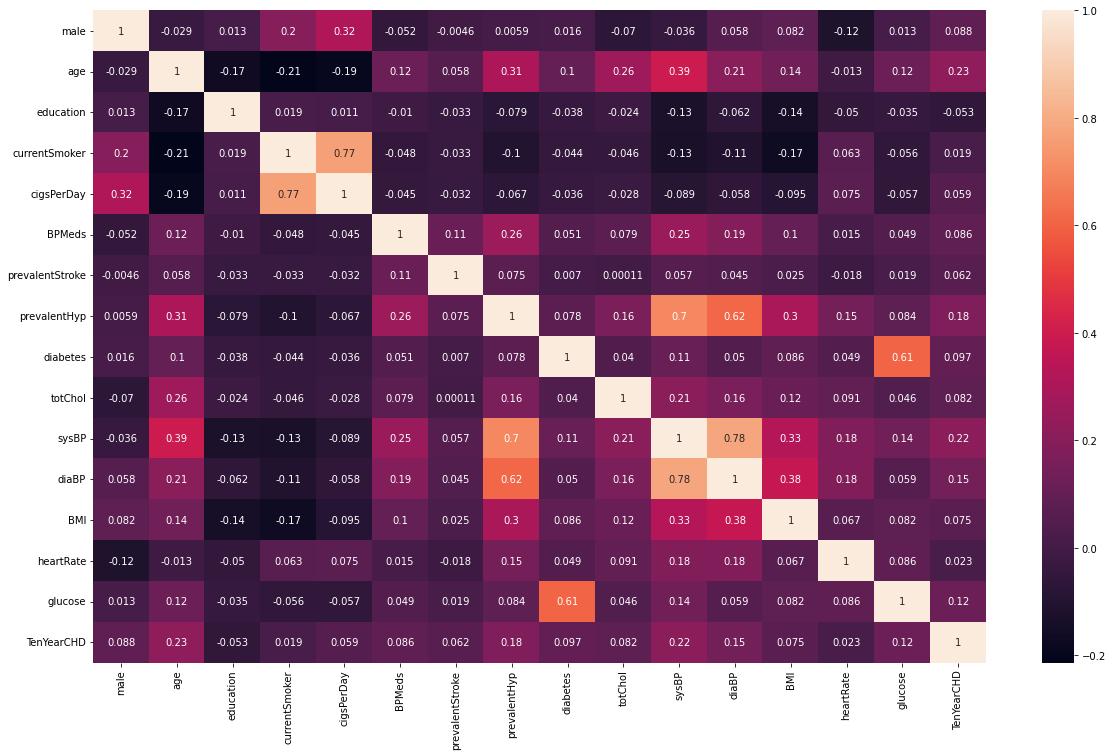

In [ ]:

plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print("Before OverSampling count of labels : {} ".format(Counter(data.TenYearCHD.values)))
smote=SMOTE()

X_ov,y_ov=smote.fit_resample(data.iloc[:,:-1].values,data.iloc[:,-1].values)
print("After OverSampling count of labels : {} ".format(Counter(y_ov)))


Before OverSampling count of labels : Counter({0: 3596, 1: 644}) 
After OverSampling count of labels : Counter({0: 3596, 1: 3596}) 


In [ ]:
print(len(X_ov[0]))

15


Feature Selection

In [ ]:
import statsmodels.regression.linear_model as sm

def baxkwordElimination(X,y,sl):
    numvars=len(X[0])
    for i in range(0,numvars):
        reg=sm.OLS(y,X).fit()
        max_p=max(reg.pvalues)

        if max_p > sl:
            for j in range(0,numvars-i):
                if reg.pvalues[j]==max_p:
                    X=np.delete(X,j,1)

    return X

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
selected_features=baxkwordElimination(X_ov,y_ov,0.05)

In [ ]:
len(selected_features[0])

11

split data to train and test

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(selected_features,y_ov,test_size=0.20)

Naive Bays

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
rf = GaussianNB()

In [ ]:
rf.fit(train_X,train_y)

GaussianNB()

In [ ]:
y_pred = rf.predict(test_X)

In [ ]:
rf.score(train_X,train_y)

0.628715452807231

In [ ]:
rf.score(test_X,test_y)

0.6219596942321056

In [ ]:
import xgboost as xgb

In [ ]:
xg_reg = xgb.XGBRFClassifier()

In [ ]:
xg_reg.fit(train_X,train_y)

XGBRFClassifier()

In [ ]:
xg_reg.score(test_X,test_y)

0.7282835302293259

In [ ]:
xg_reg.score(train_X,train_y)

0.7392664696679994